# Generating panels for Figure S3

In [1]:
import os, progressbar, re, subprocess, time

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as multicomp

from Bio import SeqIO
from Bio.Seq import Seq, MutableSeq

In [2]:
def is_significant(mut_tol):
    if mut_tol > 2:
        return 'HIGH'
    if mut_tol < -2:
        return 'LOW'
    else:
        return 'non significant'


def cluster(x):
    if x in HG_high_agg['proteinID_x'].values:
        return 'HIGH'
    else:
        return 'LOW'

In [3]:
HG_cds_fasta = '../../data/ortholog_dataset/uni_HG_cds_orthologs.faa'
MM_cds_fasta = '../../data/ortholog_dataset/uni_MM_cds_orthologs.faa'

In [4]:
MM_non_valids = []
for seqRecord in SeqIO.parse(MM_cds_fasta, format='fasta') :
    try:
        AA_seq = seqRecord.seq.translate(to_stop=True)
        if AA_seq[0] != 'M':
            MM_non_valids.append(seqRecord.id)
    except:
        MM_non_valids.append(seqRecord.id)

/home/savvy/bin/miniconda3/envs/bioinfo_3.8/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [5]:
HG_non_valids = []
for seqRecord in SeqIO.parse(HG_cds_fasta, format='fasta') :
    try:
        AA_seq = seqRecord.seq.translate(to_stop=True)
        if AA_seq[0] != 'M':
            HG_non_valids.append(seqRecord.id)
    except:
        HG_non_valids.append(seqRecord.id)

In [6]:
len(HG_non_valids)

2014

In [7]:
#### Table with all per-protein aggregation propensity scores
prot_agg_table = pd.read_csv('../../data/aggregation_propensity/HGMM_agg_scores.csv', sep=',')
prot_agg_table['delta_aggregation'] = prot_agg_table['Aggregation_x'] - prot_agg_table['Aggregation_y']
prot_agg_table['delta_agg_z-scores'] = stats.zscore(prot_agg_table['delta_aggregation'])
prot_agg_table['difference_of_aggregation'] = prot_agg_table['delta_agg_z-scores'].apply(is_significant)

prot_muttol_table = pd.read_csv('../../data/mutation_tolerance/all_mt_scores_for_revisions.csv', sep='\t')

HG_high_agg = prot_agg_table[prot_agg_table['delta_agg_z-scores'] > 2]
HG_low_agg = prot_agg_table[prot_agg_table['delta_agg_z-scores'] < -2]

sign_agg_table = prot_muttol_table[(prot_muttol_table['proteinID_x'].isin(HG_high_agg['proteinID_x'])) | (prot_muttol_table['proteinID_x'].isin(HG_low_agg['proteinID_x'])) ].reset_index(drop=True)
sign_agg_table['AGG_DIFF'] = sign_agg_table['proteinID_x'].apply(cluster)

In [8]:
len(prot_muttol_table)

8165

In [9]:
prot_muttol_table[(prot_muttol_table['proteinID_x'].isin(HG_non_valids)) ]

,proteinID_x,mutTol_0_x,mutTol_minus0_x,mutTol_plus0_x,bm_r_x,dm_r_x,proteinID_y,mutTol_0_y,mutTol_minus0_y,mutTol_plus0_y,bm_r_y,dm_r_y,Aggregation_x,length_x,Aggregation_y,length_y
50,G5BTY0,1.0,1.0,1.0,0.0,0.0,Q4FZG8,0.354904,0.747219,0.607685,0.255814,0.022245,10.885933,134,7.767268,168
57,G5BXP3,1.0,1.0,1.0,0.0,0.0,Q2TB02,0.286093,0.695860,0.590234,0.000000,0.014862,1.830370,438,2.744303,327
62,G5BDI0,0.0,1.0,0.0,0.0,0.0,Q9EQY0,0.359492,0.672177,0.687315,0.000000,0.000000,5.755978,956,6.460838,977
82,G5BXH2,0.0,1.0,0.0,0.0,0.0,Q8C159,0.349834,0.655901,0.693933,0.009659,0.003622,9.552484,310,7.162789,568
100,G5B4M8,1.0,1.0,1.0,0.0,0.0,P70372,0.267526,0.632990,0.634536,0.003093,0.017526,3.519945,329,3.521113,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,G5C614,0.0,1.0,0.0,0.0,0.0,Q9D3R6,0.298946,0.669435,0.629511,0.021399,0.004791,4.058002,520,4.226887,539
8003,G5C2W5,1.0,1.0,1.0,0.0,0.0,Q62141,0.287879,0.719233,0.568646,0.000000,0.000000,3.125997,1119,3.363786,1098
8011,G5AWM1,1.0,1.0,1.0,0.0,0.0,Q6WBX7,0.370323,0.660289,0.710034,0.009779,0.007653,7.955380,400,6.909556,403
8084,G5ARC4,0.0,1.0,0.0,0.0,0.0,Q8CHV6,0.362352,0.700267,0.662085,0.000000,0.005346,1.209539,436,1.169567,443


In [10]:
prot_muttol_table[~(prot_muttol_table['proteinID_x'].isin(HG_non_valids)) | (prot_muttol_table['proteinID_y'].isin(MM_non_valids))]

,proteinID_x,mutTol_0_x,mutTol_minus0_x,mutTol_plus0_x,bm_r_x,dm_r_x,proteinID_y,mutTol_0_y,mutTol_minus0_y,mutTol_plus0_y,bm_r_y,dm_r_y,Aggregation_x,length_x,Aggregation_y,length_y
0,G5B678,0.410923,0.731469,0.679454,0.018856,0.020806,Q3UHI4,0.538623,0.748818,0.789806,0.013663,0.009459,4.147276,261,3.305945,326
1,G5BQT4,0.268066,0.728027,0.540039,0.007812,0.013184,Q9QYK9,0.317336,0.648384,0.668952,0.007835,0.010774,4.179275,346,4.195598,343
2,G5CB95,0.518057,0.724367,0.793690,0.000000,0.000000,Q8C120,0.481424,0.738378,0.743046,0.000000,0.000000,2.197379,821,1.644278,878
3,G5BYK8,0.575615,0.855510,0.720106,0.146249,0.000000,Q7TPN9,0.629420,0.846110,0.783310,0.000000,0.000000,1.970396,591,1.975788,612
4,G5B0K6,0.324176,0.756044,0.568132,0.220879,0.012088,Q9DAM3,0.701339,0.824923,0.876416,0.000000,0.004119,2.517280,157,0.027411,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8160,G5CAQ3,0.486726,0.772963,0.713763,0.000000,0.000915,E9Q1A5,0.486815,0.742973,0.743842,0.000000,0.000580,0.594638,555,0.563788,584
8161,G5AWC8,0.251229,0.659784,0.591445,0.000000,0.004425,Q3UXZ6,0.405682,0.698184,0.707499,0.000000,0.001397,0.408910,346,0.761354,364
8162,G5C5H8,0.535542,0.736747,0.798795,0.000000,0.006024,Q62231,0.530120,0.727711,0.802410,0.000000,0.006024,0.613761,284,0.619046,284
8163,G5AR65,0.436335,0.777950,0.658385,0.000000,0.008540,Q80VJ2,0.562360,0.783420,0.778940,0.000000,0.007468,0.573265,223,0.547302,232


In [12]:
outliers = prot_muttol_table[(prot_muttol_table['proteinID_x'].isin(HG_non_valids)) | (prot_muttol_table['proteinID_y'].isin(MM_non_valids))]
no_outliers = prot_muttol_table.drop(outliers.index)

In [16]:
def generate_figure_4A(prot_muttol_table, col_x, col_y, plot_title):
    sns.set_context("paper", font_scale=2)
    sns.set_style("ticks") 
    sns.despine(offset=20)

    prot_muttol_table['diff_mut'] = prot_muttol_table[col_x] - prot_muttol_table[col_y]
    prot_muttol_table['diff_mut_z-scores'] = stats.zscore(prot_muttol_table['diff_mut'])
    prot_muttol_table['MT_DIFF'] = prot_muttol_table['diff_mut_z-scores'].apply(is_significant)

    if plot_title == 'only_beneficial_mutations':
        label_y = 'Proportion of beneficial mutations'
    elif plot_title == 'only_detrimental_mutations':
        label_y = 'Proportion of detrimental mutations'
    else : 
        label_y = 'Mouse mutation tolerance'

    fig = plt.figure(figsize= (8, 8))
    sns.scatterplot(x=prot_muttol_table[col_x], y=prot_muttol_table[col_y], hue=prot_muttol_table['MT_DIFF'], hue_order=['non significant', 'HIGH', 'LOW'], palette=['black', 'purple', 'salmon'],legend=False)
    plt.ylabel(f'{label_y} in mouse')
    plt.xlabel(f'{label_y} in naked mole-rat')
    
    
    print(f'Stats for mouse vs. naked mole-rat {plot_title} ')
    corr, pval = stats.pearsonr( x=prot_muttol_table[col_x], y=prot_muttol_table[col_y])
    print('Correlation between mutation tolerance')
    print(corr, pval)

    # fig.savefig(f'../../figures/revisions/mutation_tolerance/{plot_title}.png', format='png', dpi=300)
    # fig.savefig(f'../../figures/revisions/mutation_tolerance/FIGURE_{plot_title}.svg', format='svg', dpi=300)

def generate_figure_4D(sign_agg_table, prot_muttol_table, col_y, plot_title):
    sns.set_context("paper", font_scale=2)
    sns.set_style("ticks")
    sns.despine(offset=20)

    plt.rcParams["figure.figsize"] = (8, 8)

    if plot_title == 'only_beneficial_mutations':
        label_y = 'Proportion of beneficial mutations in mouse'
    elif plot_title == 'only_detrimental_mutations':
        label_y = 'Proportion of detrimental mutations in mouse'
    else : 
        label_y = 'Mouse mutation tolerance'

    j = sns.jointplot(data=sign_agg_table, y=col_y, x='Aggregation_y',
                    hue='AGG_DIFF', palette=['red', 'blue'], legend=False)
    j.set_axis_labels('Mouse whole-protein sequence \naggregation propensity score',
                    label_y, fontsize=16)

    MT_vs_HIGH_AGG = prot_muttol_table[prot_muttol_table['proteinID_x'].isin(
        HG_high_agg['proteinID_x'])]
    MT_vs_LOW_AGG = prot_muttol_table[prot_muttol_table['proteinID_x'].isin(
        HG_low_agg['proteinID_x'])]

    print(f'\nStats for {plot_title} in mouse')
    print('Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse')
    ks, pval = stats.kstest(MT_vs_HIGH_AGG[col_y], MT_vs_LOW_AGG[col_y])
    print(ks, pval)
    print(stats.ttest_ind(MT_vs_HIGH_AGG[col_y], MT_vs_LOW_AGG[col_y]))
    # plt.annotate(f'KS test p-value={pval:0.2e}', xy=(2,4), xycoords='figure points')

    # j.savefig(f'../../figures/revisions/mutation_tolerance/{plot_title}_mouse.png', format='png', dpi=300)
    # j.savefig('../../figures/revisions/mutation_tolerance/FIGURE4_C_v1.svg', format='svg', dpi=300)

def generate_figure_4E(sign_agg_table, prot_muttol_table, col_x, plot_title):
    sns.set_context("paper", font_scale=2)
    sns.set_style("ticks")
    sns.despine(offset=20)

    plt.rcParams["figure.figsize"] = (8, 8)

    if plot_title == 'only_beneficial_mutations':
        label_y = 'Proportion of beneficial mutations in naked mole-rat'
    elif plot_title == 'only_detrimental_mutations':
        label_y = 'Proportion of detrimental mutations in naked mole-rat'
    else :
        label_y = 'Naked mole-rat mutation tolerance'

    j = sns.jointplot(data=sign_agg_table, y=col_x, x='Aggregation_x',
                      hue='AGG_DIFF', palette=['red', 'blue'], legend=False)
    j.set_axis_labels('Naked mole-rat whole-protein sequence \naggregation propensity score',
                      label_y, fontsize=16)


    MT_vs_HIGH_AGG = prot_muttol_table[prot_muttol_table['proteinID_x'].isin(
        HG_high_agg['proteinID_x'])]
    MT_vs_LOW_AGG = prot_muttol_table[prot_muttol_table['proteinID_x'].isin(
        HG_low_agg['proteinID_x'])]

    print(f'\nStats for {plot_title} in naked mole-rat')
    print('Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat')
    ks, pval = stats.kstest(MT_vs_HIGH_AGG[col_x], MT_vs_LOW_AGG[col_x])
    print(ks, pval)
    print(stats.ttest_ind(MT_vs_HIGH_AGG[col_x], MT_vs_LOW_AGG[col_x]))
    # plt.annotate(f'KS test p-value={pval:0.2e}', xy=(2,4), xycoords='figure points')
    # j.savefig(f'../../figures/revisions/mutation_tolerance/{plot_title}_nkr.png', format='png', dpi=300)
    # j.savefig('../../figures/revisions/mutation_tolerance/FIGURE4_D_v1.svg', format='svg', dpi=300)


Stats for mouse vs. naked mole-rat mutation_tolerance_0 
Correlation between mutation tolerance
0.8329937712146109 0.0

Stats for mutation_tolerance_0 in mouse
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse
0.07994994438264738 0.49249031362238227

Stats for mutation_tolerance_0 in naked mole-rat
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat
0.23697626992955134 1.3604261506872106e-05


<Figure size 576x576 with 0 Axes>

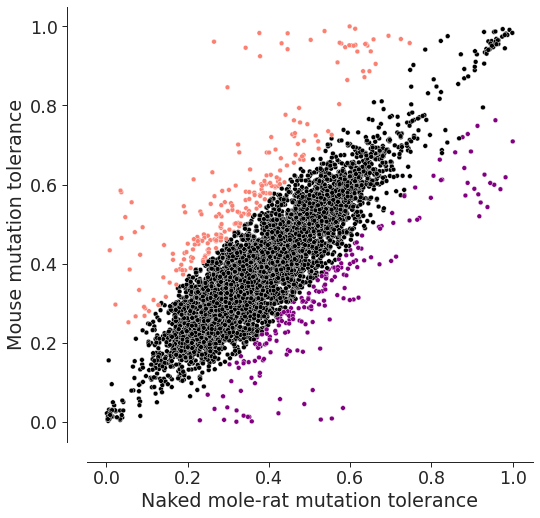

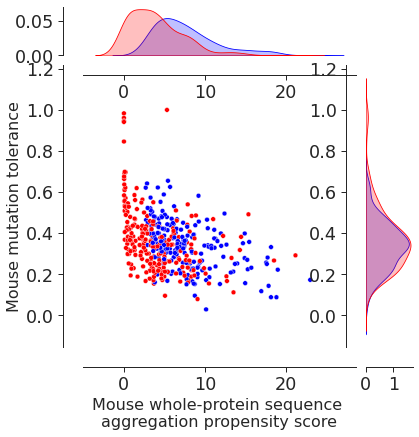

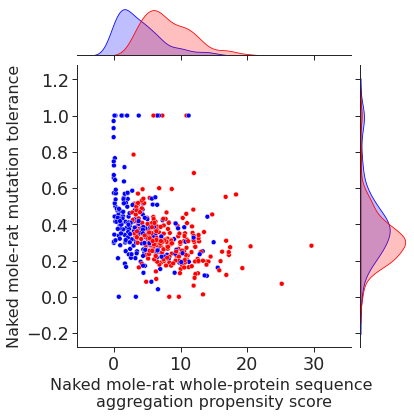

In [165]:
col1 = 'mutTol_0_x'
col2= 'mutTol_0_y'
title = 'mutation_tolerance_0'
generate_figure_4A(no_outliers, col1, col2, title)
generate_figure_4D(sign_agg_table, no_outliers, col2, title)
generate_figure_4E(sign_agg_table, no_outliers, col1, title)

Stats for mouse vs. naked mole-rat mutation_minus0 
Correlation between mutation tolerance
0.7705529080673025 0.0

Stats for mutation_minus0 in mouse
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse
0.0753615127919911 0.5666056080889952

Stats for mutation_minus0 in naked mole-rat
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat
0.12838338895068593 0.05940606786670655


<Figure size 576x576 with 0 Axes>

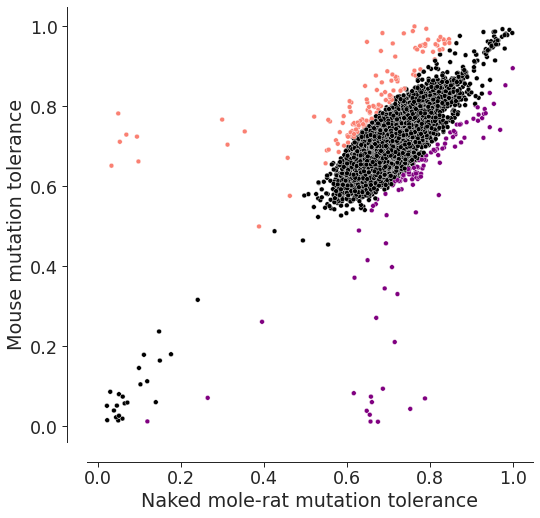

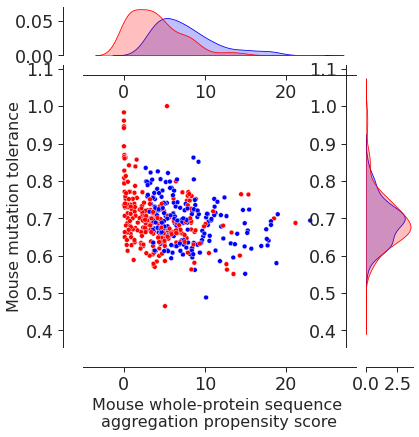

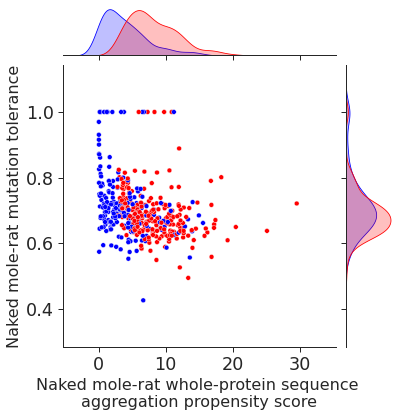

In [164]:
col1 = 'mutTol_minus0_x'
col2= 'mutTol_minus0_y'
title = 'mutation_minus0'
generate_figure_4A(no_outliers, col1, col2, title)
generate_figure_4D(sign_agg_table, no_outliers, col2, title)
generate_figure_4E(sign_agg_table, no_outliers, col1, title)

In [17]:
col_x = 'mutTol_plus0_x'
col_y = 'mutTol_plus0_y'
title = 'mutation_plus0'
generate_figure_4A(no_outliers, col_x, col_y, title)
generate_figure_4D(sign_agg_table, no_outliers, col_y, title)
generate_figure_4E(sign_agg_table, no_outliers, col_x, title)

Stats for mouse vs. naked mole-rat mutation_plus0 
Correlation between mutation tolerance
0.6946726179390473 0.0

Stats for mutation_plus0 in mouse
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse
0.14488320355951056 0.023027292157844492
Ttest_indResult(statistic=2.2365976487604913, pvalue=0.02584192910358171)

Stats for mutation_plus0 in naked mole-rat
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat
0.2529662588060808 2.6189515240915284e-06
Ttest_indResult(statistic=-5.369396733390772, pvalue=1.3163869138372802e-07)


Stats for mouse vs. naked mole-rat only_beneficial_mutations 
Correlation between mutation tolerance
0.4327599191884576 0.0

Stats for only_beneficial_mutations in mouse
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse
0.36359844271412683 1.1922685061449556e-12

Stats for only_beneficial_mutations in naked mole-rat
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat
0.3918242491657397 1.0658141036401503e-14


<Figure size 576x576 with 0 Axes>

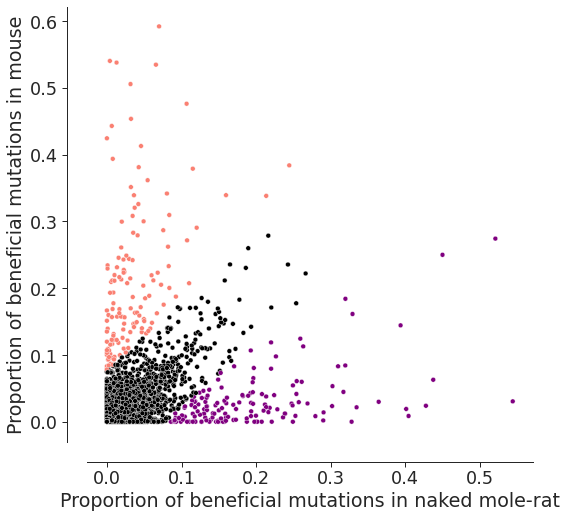

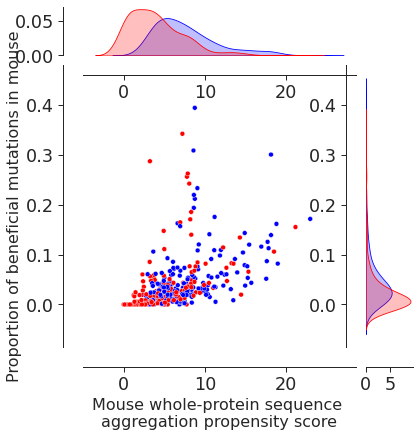

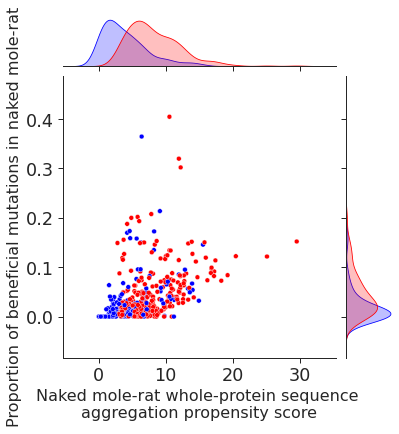

In [172]:
col1 = 'bm_r_x'
col2= 'bm_r_y'
title = 'only_beneficial_mutations'
generate_figure_4A(no_outliers, col1, col2, title)
generate_figure_4D(sign_agg_table, no_outliers, col2, title)
generate_figure_4E(sign_agg_table, no_outliers, col1, title)

Stats for mouse vs. naked mole-rat only_detrimental_mutations 
Correlation between mutation tolerance
0.8970111930084813 0.0

Stats for only_detrimental_mutations in mouse
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in mouse
0.06632369299221356 0.7202828954504958

Stats for only_detrimental_mutations in naked mole-rat
Difference of distribution in mutation tolerance between proteins with sgnificant difference of aggregation propensity in naked mole-rat
0.07397107897664071 0.5892831166377848


<Figure size 576x576 with 0 Axes>

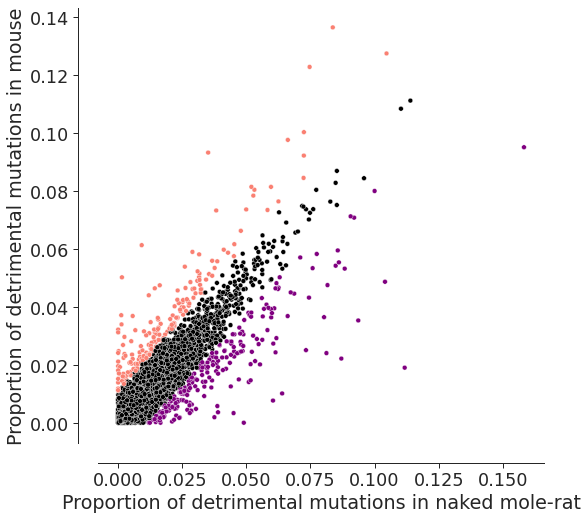

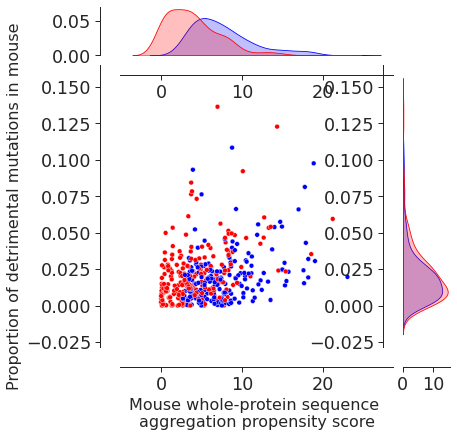

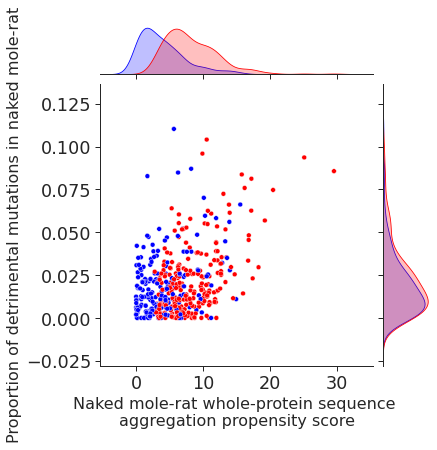

In [173]:
col1 = 'dm_r_x'
col2= 'dm_r_y'
title = 'only_detrimental_mutations'
generate_figure_4A(no_outliers, col1, col2, title)
generate_figure_4D(sign_agg_table, no_outliers, col2, title)
generate_figure_4E(sign_agg_table, no_outliers, col1, title)

___________

#### Prediction of mutation effects 

In [107]:
prot_muttol_table[prot_muttol_table['proteinID_y'] == 'P28658']

,proteinID_x,mutTol_v1_x,mutTol_v2_x,mutTol_v3_x,proteinID_y,mutTol_v1_y,mutTol_v2_y,mutTol_v3_y,Aggregation_x,length_x,...,length_y,diff_mut_v1,diff_mut_v1_z-scores,MT_DIFF_v1,diff_mut_v2,diff_mut_v2_z-scores,MT_DIFF_v2,diff_mut_v3,diff_mut_v3_z-scores,MT_DIFF_v3
9287,G5BVC0,0.03956,0.425,0.273352,P28658,0.027909,0.488904,0.321453,6.631717,587,...,475,0.011652,0.206591,non significant,-0.063904,-1.136093,non significant,-0.048101,-0.773638,non significant


In [105]:
prot_muttol_table[prot_muttol_table['proteinID_y'] == 'Q9CVD2']

,proteinID_x,mutTol_v1_x,mutTol_v2_x,mutTol_v3_x,proteinID_y,mutTol_v1_y,mutTol_v2_y,mutTol_v3_y,Aggregation_x,length_x,...,length_y,diff_mut_v1,diff_mut_v1_z-scores,MT_DIFF_v1,diff_mut_v2,diff_mut_v2_z-scores,MT_DIFF_v2,diff_mut_v3,diff_mut_v3_z-scores,MT_DIFF_v3
3653,G5AZL7,0.378484,0.628484,0.127178,Q9CVD2,0.396116,0.660795,0.130985,3.769504,373,...,355,-0.017631,-0.154426,non significant,-0.032311,-0.559825,non significant,-0.003807,-0.106302,non significant


In [10]:
HG_cds_fasta = '../../data/ortholog_dataset/uni_HG_cds_orthologs.faa'
MM_cds_fasta = '../../data/ortholog_dataset/uni_MM_cds_orthologs.faa'

In [37]:
def get_Seq(seqID, org):
    if 'MM' in org :
        for seqRecord in SeqIO.parse(MM_cds_fasta, format='fasta'):
            if seqRecord.id == seqID :
                return seqRecord
    elif 'HG' in org : 
        for seqRecord in SeqIO.parse(HG_cds_fasta, format='fasta'):
            if seqRecord.id == seqID :
                return seqRecord



def get_Mut(seqID, seqRecord, output_name):
    aa_changes = []
    variations = []
    # MUT_RES = '/media/savvy/Seagate/PhD_Project/project_2018/computational_mutagenesis/FINAL_RESULTS'
    MUT_RES = '/media/savvy/DATA3/savvy/project_2018/computational_mutagenesis/FINAL_RESULTS'

    seq_length = len(seqRecord.seq.translate().replace('*', ''))

    TMP = pd.read_csv(os.path.join(MUT_RES,f'{seqID}_aggregation.txt'), sep='\t')
    
    TMP['deltaAgg'] = TMP['Aggregation'] / seq_length - TMP['Aggregation'][0] / seq_length

    ALL_MUT = [ ( TMP['Sequence'][i], TMP['deltaAgg'][i], TMP['Sequence'][i].split('_')[1], TMP['Sequence'][i].split('_')[2][0], TMP['Sequence'][i].split('_')[2][1] )  for i in TMP.index[1:] ]

    nc_mutTable = pd.DataFrame(ALL_MUT, columns=['Sequence_ID', 'deltaAgg', 'i', 'REF', 'ALT'])
    nc_mutTable['nucl_changes'] = [ f'{nc_mutTable["i"][i]}{nc_mutTable["REF"][i]}{nc_mutTable["ALT"][i]}' for i in nc_mutTable.index ]
    for idx in nc_mutTable.index :
        i = int(nc_mutTable['i'][idx])
        REF = nc_mutTable['REF'][idx]
        ALT = nc_mutTable['ALT'][idx]

        REF_SEQ = str(seqRecord.seq.translate())
        mutant = MutableSeq(str(seqRecord.seq))
        mutant[i] = ALT
        ALT_SEQ = str(Seq(str(mutant)).translate())

        if (ALT_SEQ.count('*') > 1) or (ALT_SEQ[0] != 'M'):
            pass 
        else : 
            REF_SEQ = REF_SEQ.replace('*', '')
            ALT_SEQ = ALT_SEQ.replace('*', '')
        
            for j in range(len(REF_SEQ) - 1) :
                if REF_SEQ[j] != ALT_SEQ[j]:
                    # provean_inputs.append(f'{ensemblID} {i+1} {REF_SEQ[i]} {ALT_SEQ[i]}')
                    aa_changes.append([f'{i}{REF}{ALT}', f'{REF_SEQ[j]}{j+1}{ALT_SEQ[j]}', j+1])

    aa_mutTable = pd.DataFrame(aa_changes, columns=['nucl_changes', 'aa_changes', 'RES_id'])
    aa_mutTable = aa_mutTable.merge(nc_mutTable, on=['nucl_changes'])
    
    # f = open(output_name, 'w')
    # for var in aa_mutTable['aa_changes']:
    #     f.write(f'{var}\n')
    # f.close()

    return aa_mutTable
        

In [ ]:
#### Atx-10 (PROVEAN inputs)
ATX10_MM = get_Seq('P28658', 'MM')
MM_ATX10_AGG = get_Mut('P28658', ATX10_MM, '../../data/PROVEAN/inputs/MM_ATX-10.txt')

ATX10_HG = get_Seq('G5BVC0', 'HG')
HG_ATX10_AGG = get_Mut('G5BVC0', ATX10_HG, '../../data/PROVEAN/inputs/HG_ATX-10.txt')

#### Atx-10 (PROVEAN outputs)
MM_ATX10_provean = pd.read_csv('../../data/PROVEAN/outputs/MM_ATX-10_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])[2:].reset_index(drop=True)
HG_ATX10_provean = pd.read_csv('../../data/PROVEAN/outputs/HG_ATX-10_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])[2:].reset_index(drop=True)

SpearmanrResult(correlation=-0.16401143403273924, pvalue=3.1055993934745376e-10)
SpearmanrResult(correlation=0.04599514621555024, pvalue=0.09764437813434616)


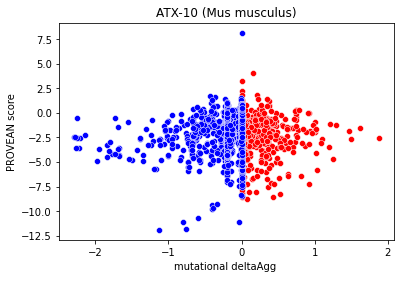

In [114]:
MM_ATX10_mutations = MM_ATX10_AGG.merge(MM_ATX10_provean, on='aa_changes')
MM_ATX10_mutations['deltaAgg_z-scores'] = stats.zscore(MM_ATX10_mutations['deltaAgg'])

sns.scatterplot(data=MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] > 0], x='deltaAgg', y='PROVEAN', color='red')
# plt.xlim(-3,3)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-10 (Mus musculus)')
print(stats.spearmanr(MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] > 0]['deltaAgg'], MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] > 0]['PROVEAN']))

sns.scatterplot(data=MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] < 0], x='deltaAgg', y='PROVEAN', color='blue')
# plt.xlim(-3,3)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-10 (Mus musculus)')
print(stats.spearmanr(MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] < 0]['deltaAgg'], MM_ATX10_mutations[MM_ATX10_mutations['deltaAgg'] < 0]['PROVEAN']))


SpearmanrResult(correlation=-0.24244280837645266, pvalue=6.034350278497013e-28)
SpearmanrResult(correlation=0.15397598515200403, pvalue=1.6431073054547225e-08)


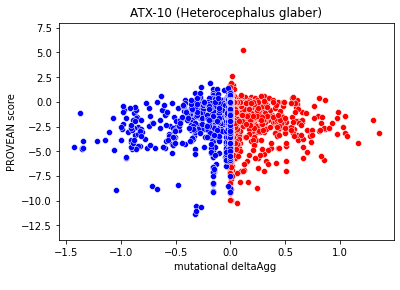

In [115]:
HG_ATX10_mutations = HG_ATX10_AGG.merge(HG_ATX10_provean, on='aa_changes')
HG_ATX10_mutations['deltaAgg_z-scores'] = stats.zscore(HG_ATX10_mutations['deltaAgg'])

sns.scatterplot(data=HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] > 0], x='deltaAgg', y='PROVEAN', color='red')
# plt.xlim(-3,3)
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-10 (Heterocephalus glaber)')
print(stats.spearmanr(HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] > 0]['deltaAgg'], HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] > 0]['PROVEAN']))

sns.scatterplot(data=HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] < 0], x='deltaAgg', y='PROVEAN', color='blue')
# plt.xlim(-3,3)
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-10 (Heterocephalus glaber)')
print(stats.spearmanr(HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] < 0]['deltaAgg'], HG_ATX10_mutations[HG_ATX10_mutations['deltaAgg'] < 0]['PROVEAN']))


In [ ]:
#### Atx-3 (provean inputs)
ATX3_MM = get_Seq('Q9CVD2', 'MM')
ATX3_HG = get_Seq('G5AZL7', 'HG')
MM_ATX3_AGG = get_Mut('Q9CVD2', ATX3_MM, '../../data/PROVEAN/inputs/MM_ATX-3.txt')
HG_ATX3_AGG = get_Mut('G5AZL7', ATX3_HG, '../../data/PROVEAN/inputs/HG_ATX-3.txt')

#### Atx-3 (PROVEAN outputs)
MM_ATX3_provean = pd.read_csv('../../data/PROVEAN/outputs/MM_ATX-3_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])[2:].reset_index(drop=True)
HG_ATX3_provean = pd.read_csv('../../data/PROVEAN/outputs/HG_ATX-3_results.tsv', sep='\t', comment='#', names=['aa_changes', 'PROVEAN', 'Mutation_Effect'])[2:].reset_index(drop=True)

SpearmanrResult(correlation=-0.2787065881058516, pvalue=2.2053801226419728e-13)
SpearmanrResult(correlation=0.26947641680414713, pvalue=2.547134359417299e-10)


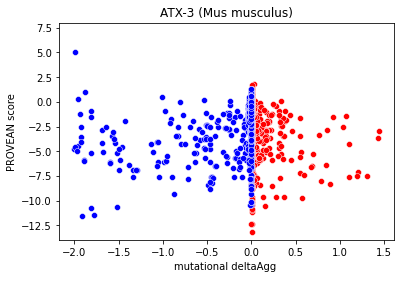

In [125]:
MM_ATX3_mutations = MM_ATX3_AGG.merge(MM_ATX3_provean, on='aa_changes')
MM_ATX3_mutations['deltaAgg_z-scores'] = stats.zscore(MM_ATX3_mutations['deltaAgg'])

sns.scatterplot(data=MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] > 0], x='deltaAgg', y='PROVEAN', color='red')
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-3 (Mus musculus)')
print(stats.spearmanr(MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] > 0]['deltaAgg'], MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] > 0]['PROVEAN']))

sns.scatterplot(data=MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] < 0], x='deltaAgg', y='PROVEAN', color='blue')
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-3 (Mus musculus)')
print(stats.spearmanr(MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] < 0]['deltaAgg'], MM_ATX3_mutations[MM_ATX3_mutations['deltaAgg'] < 0]['PROVEAN']))


SpearmanrResult(correlation=-0.06912754480807459, pvalue=0.055826663676635045)
SpearmanrResult(correlation=0.14046414354887096, pvalue=0.001307161439871238)


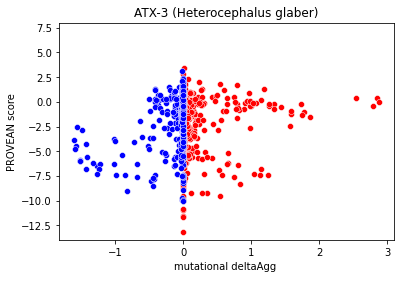

In [126]:
HG_ATX3_mutations = HG_ATX3_AGG.merge(HG_ATX3_provean, on='aa_changes')
HG_ATX3_mutations['deltaAgg_z-scores'] = stats.zscore(HG_ATX3_mutations['deltaAgg'])

sns.scatterplot(data=HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] > 0], x='deltaAgg', y='PROVEAN', color='red')
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-10 (Heterocephalus glaber)')
print(stats.spearmanr(HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] > 0]['deltaAgg'], HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] > 0]['PROVEAN']))

sns.scatterplot(data=HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] < 0], x='deltaAgg', y='PROVEAN', color='blue')
plt.ylim(-14, 8)
plt.ylabel('PROVEAN score')
plt.xlabel('mutational deltaAgg \n')
plt.title('ATX-3 (Heterocephalus glaber)')
print(stats.spearmanr(HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] < 0]['deltaAgg'], HG_ATX3_mutations[HG_ATX3_mutations['deltaAgg'] < 0]['PROVEAN']))
